In [3]:
import pandas as pd

In [4]:
topic_df = pd.read_csv(
    "/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/training_logs/topic_clustering.csv"
)

topic_df.head()

,unique_predicted_labels,accuracy,precision,recall,f1_score,confusion_matrix,train_loss,val_loss,start_time,end_time,training_time,num_epochs,batch_size,model_name,model_path,lr
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",69.792935,87.982994,69.792935,75.114993,cancer d...,0.841132,0.624254,2025-07-02 09:49:15.516438,2025-07-02 09:49:54.749879,39.233441,1,16,google/bert_uncased_L-2_H-128_A-2,src/ml_models/model_files/topic_clustering_mod...,0.0010
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",73.507917,86.490981,73.507917,78.076230,cancer d...,0.859194,0.738549,2025-07-02 09:53:10.129583,2025-07-02 09:53:46.960284,36.830701,1,16,google/bert_uncased_L-2_H-128_A-2,src/ml_models/model_files/topic_clustering_mod...,0.0010
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",82.095006,92.496934,82.095006,85.684584,cancer d...,0.272975,0.555589,2025-07-02 09:56:17.129874,2025-07-02 10:01:35.860099,318.730225,10,32,google/bert_uncased_L-2_H-128_A-2,src/ml_models/model_files/topic_clustering_mod...,0.0010
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",82.643118,91.669031,82.643118,85.897986,cancer d...,0.234548,0.681628,2025-07-02 10:02:25.038630,2025-07-02 10:13:02.454080,637.415450,20,32,google/bert_uncased_L-2_H-128_A-2,src/ml_models/model_files/topic_clustering_mod...,0.0010
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",83.252132,91.578542,83.252132,86.286280,cancer d...,0.235535,0.597587,2025-07-02 10:21:40.551729,2025-07-02 10:32:23.801593,643.249864,20,32,google/bert_uncased_L-2_H-128_A-2,src/ml_models/model_files/topic_clustering_mod...,0.0001


In [5]:
topic_df = topic_df[topic_df["model_name"] == "google/bert_uncased_L-2_H-128_A-2"]

In [6]:
topic_df = topic_df[["accuracy", "training_time", "num_epochs", "batch_size", "lr"]]

In [7]:
topic_df = topic_df[topic_df["batch_size"] == 32]
topic_df = topic_df[topic_df["lr"] == 5e-6]

In [8]:
topic_df.head(10)

,accuracy,training_time,num_epochs,batch_size,lr
8,75.700365,942.959489,30,32,0.000005
9,79.658952,1564.509933,50,32,0.000005
10,81.059683,2521.779356,80,32,0.000005
11,82.338611,4972.838196,150,32,0.000005


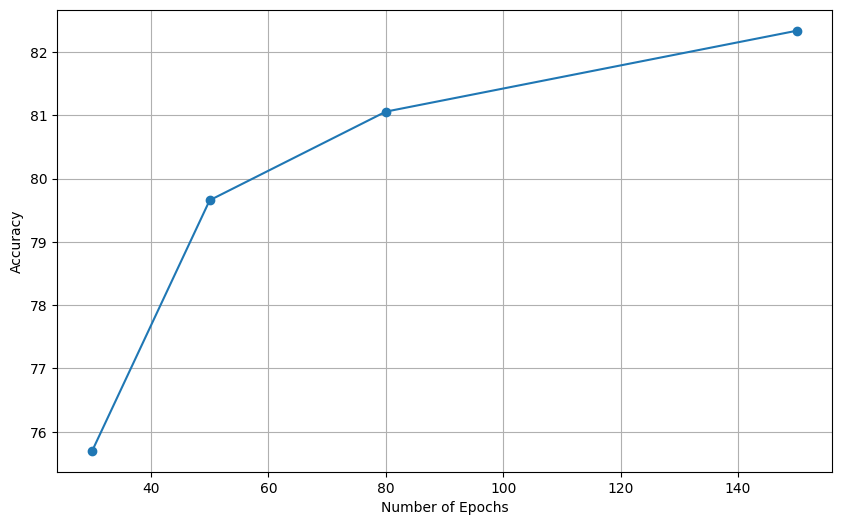

In [14]:
# plot accuracy vs num_epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(topic_df["num_epochs"], topic_df["accuracy"], marker="o")
# plt.title("Accuracy vs Number of Epochs for Topic Classification")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

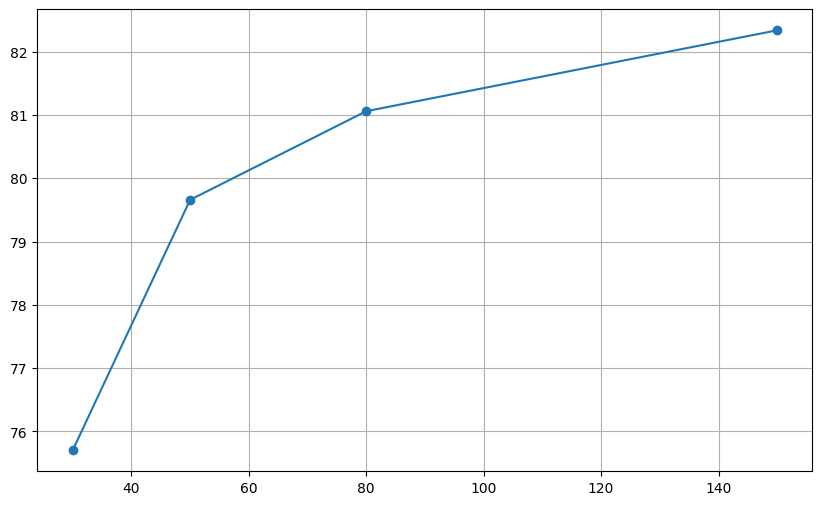

In [11]:
# plot accuracy vs num_epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(topic_df["num_epochs"], topic_df["accuracy"], marker="o")
plt.grid()
plt.show()

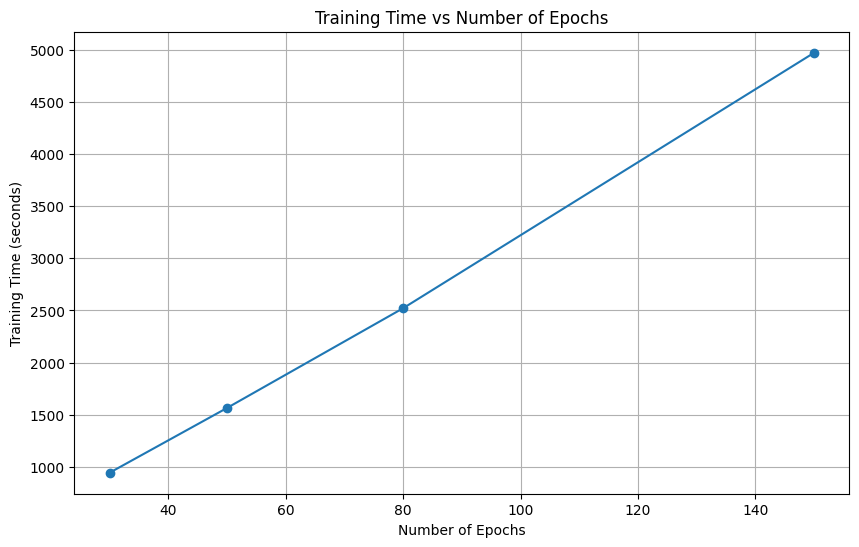

In [10]:
# plot training time vs num_epochs
plt.figure(figsize=(10, 6))
plt.plot(topic_df["num_epochs"], topic_df["training_time"], marker="o")
plt.title("Training Time vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Time (seconds)")
plt.grid()
plt.show()

In [68]:
emotion_df = pd.read_csv(
    "/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/training_logs/emotion_recognition.csv"
)

In [69]:
emotion_df.head(10)

,unique_predicted_labels,accuracy,precision,recall,f1_score,confusion_matrix,train_loss,val_loss,start_time,end_time,...,num_classes,kernel_sizes,num_filters,lr,dropout,batch_size,train_data_path,test_data_path,validation_data_path,model_path
0,"[0, 1, 2, 3, 4, 5]",84.70,84.915851,84.70,84.324688,sadness joy love ang...,0.950246,0.430800,2025-06-08 13:40:20.725583,2025-06-08 13:40:55.066882,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
1,"[0, 1, 2, 3, 4, 5]",73.45,73.552743,73.45,72.557264,sadness joy love ang...,1.273541,0.788763,2025-06-08 13:44:19.730496,2025-06-08 13:44:37.579104,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
2,"[0, 1, 2, 3, 4, 5]",84.95,85.443026,84.95,84.836444,sadness joy love ang...,0.923899,0.441151,2025-06-08 13:44:41.048906,2025-06-08 13:45:14.084862,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
3,"[0, 1, 2, 3, 4, 5]",67.20,70.603602,67.20,65.507185,sadness joy love ang...,1.292763,0.836197,2025-06-08 13:46:31.245496,2025-06-08 13:46:48.808948,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
4,"[0, 1, 2, 3, 4, 5]",86.20,86.172968,86.20,86.139518,sadness joy love ang...,0.910550,0.387863,2025-06-08 13:46:52.089089,2025-06-08 13:47:26.766960,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
5,"[0, 1, 2, 3, 4, 5]",86.65,86.783369,86.65,86.549719,sadness joy love ang...,0.807419,0.369140,2025-06-08 13:47:31.182669,2025-06-08 13:48:23.556576,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
6,"[0, 1, 2, 3, 4, 5]",89.20,89.234655,89.20,89.124689,sadness joy love ang...,0.056995,0.396522,2025-06-08 13:49:27.173375,2025-06-08 13:51:32.431321,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
7,"[0, 1, 2, 3, 4, 5]",90.10,90.182899,90.10,90.098485,sadness joy love ang...,0.067682,0.501400,2025-06-08 13:51:35.781181,2025-06-08 13:56:45.780583,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
8,"[0, 1, 2, 3, 4, 5]",89.60,89.850662,89.60,89.363456,sadness joy love ang...,0.071816,0.671997,2025-06-08 13:56:49.802445,2025-06-08 14:05:48.147762,...,6,"[3, 4, 5]",100,0.0010,0.2,32,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth
9,"[0, 1, 2, 3, 4, 5]",83.10,83.474214,83.10,82.812790,sadness joy love ang...,0.197957,0.449083,2025-06-08 14:24:45.558752,2025-06-08 14:29:27.101048,...,6,"[3, 4, 5]",100,0.0001,0.2,64,src/data/emotion_data/training.csv,src/data/emotion_data/test.csv,src/data/emotion_data/validation.csv,src/ml_models/model_files/cnn_model.pth


In [70]:
emotion_df = emotion_df[["accuracy", "training_time", "num_epochs", "batch_size", "lr"]]

In [71]:
emotion_df.head()

,accuracy,training_time,num_epochs,batch_size,lr
0,84.70,34.341299,1,32,0.001
1,73.45,17.848608,10,32,0.001
2,84.95,33.035956,10,32,0.001
3,67.20,17.563452,10,32,0.001
4,86.20,34.677871,10,32,0.001


In [72]:
emotion_df["lr"].value_counts()

lr
0.0010    14
0.0001     4
Name: count, dtype: int64

In [73]:
emotion_df_lr_0_001 = emotion_df[emotion_df["lr"] == 0.001]
emotion_df_lr_0_0001 = emotion_df[emotion_df["lr"] == 0.0001]

In [74]:
emotion_df_lr_0_001.head(10)

,accuracy,training_time,num_epochs,batch_size,lr
0,84.70,34.341299,1,32,0.001
1,73.45,17.848608,10,32,0.001
2,84.95,33.035956,10,32,0.001
3,67.20,17.563452,10,32,0.001
4,86.20,34.677871,10,32,0.001
5,86.65,52.373907,10,32,0.001
6,89.20,125.257946,10,32,0.001
7,90.10,309.999402,10,32,0.001
8,89.60,538.345317,10,32,0.001
13,90.00,292.197752,10,32,0.001


In [75]:
emotion_df_lr_0_0001.head(10)

,accuracy,training_time,num_epochs,batch_size,lr
9,83.10,281.542296,10,64,0.0001
10,87.80,352.437737,10,32,0.0001
11,86.70,658.362112,20,16,0.0001
12,88.55,614.759723,20,32,0.0001


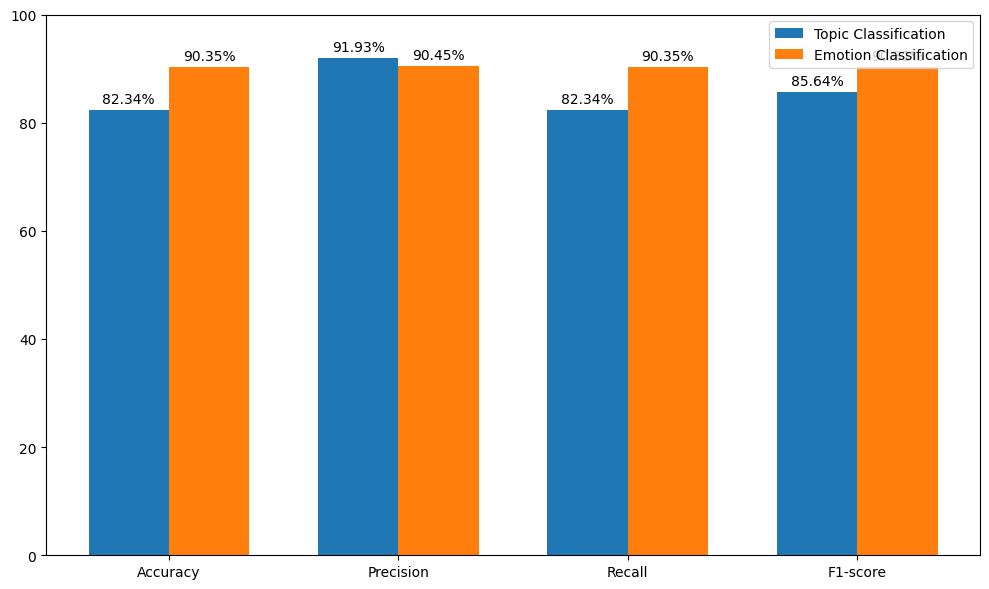

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
topic_classification = [82.34, 91.93, 82.34, 85.64]
emotion_classification = [90.35, 90.45, 90.35, 90.31]

# Settings
bar_width = 0.35
x = np.arange(len(metrics))  # 0, 1, 2, 3

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, topic_classification, bar_width, label='Topic Classification', color='#1f77b4')
bars2 = ax.bar(x + bar_width/2, emotion_classification, bar_width, label='Emotion Classification', color='#ff7f0e')

# Labels and formatting
# ax.set_xlabel('Metrics')
# ax.set_ylabel('Percentage (%)')
# ax.set_title('Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 100)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
cancer_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/cancer/CancerQA.csv")
cancer_row = cancer_df.shape[0]
print(cancer_row)

729


In [18]:
diabetes_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/diabetes/Diabetes_and_Digestive_and_Kidney_DiseasesQA.csv")
diabetes_row = diabetes_df.shape[0]
print(diabetes_row)

1192


In [19]:
disease_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/disease_control_and_prevention/Disease_Control_and_PreventionQA.csv")
disease_row = disease_df.shape[0]
print(disease_row)

270


In [20]:
genetic_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/genetic_and_rare_diseases/Genetic_and_Rare_DiseasesQA.csv")
genetic_row = genetic_df.shape[0]
print(genetic_row)

5388


In [21]:
growth_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/growth_hormone_receptor/growth_hormone_receptorQA.csv")
growth_row = growth_df.shape[0]
print(growth_row)

5430


In [22]:
heart_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/heart_lung_and_blood/Heart_Lung_and_BloodQA.csv")
heart_row = heart_df.shape[0]
print(heart_row)

559


In [23]:
neurological_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/neurological_disorders_and_stroke/Neurological_Disorders_and_StrokeQA.csv")
neurological_row = neurological_df.shape[0]
print(neurological_row)

1088


In [24]:
other_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/others/OtherQA.csv")
other_row = other_df.shape[0]
print(other_row)

981


In [25]:
senior_df = pd.read_csv("/Users/nguyennguyen/Desktop/github_repos/personal/rag_medical/src/data/medical_data/senior_health/SeniorHealthQA.csv")
senior_row = senior_df.shape[0]
print(senior_row)

769


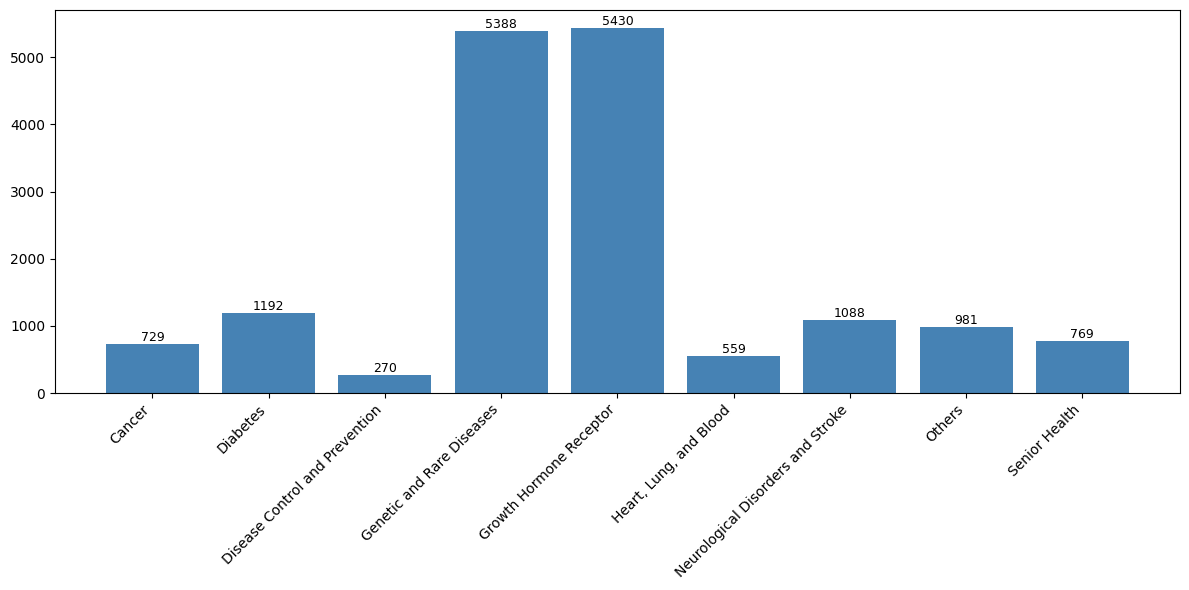

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual row counts)
data_row = {
    "Cancer": cancer_row,
    "Diabetes": diabetes_row,
    "Disease Control and Prevention": disease_row,
    "Genetic and Rare Diseases": genetic_row,
    "Growth Hormone Receptor": growth_row,
    "Heart, Lung, and Blood": heart_row,
    "Neurological Disorders and Stroke": neurological_row,
    "Others": other_row,
    "Senior Health": senior_row
}

# Convert to Series for easier plotting
data_series = pd.Series(data_row)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(data_series.index, data_series.values, color='steelblue')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Rows in Each Medical Dataset')

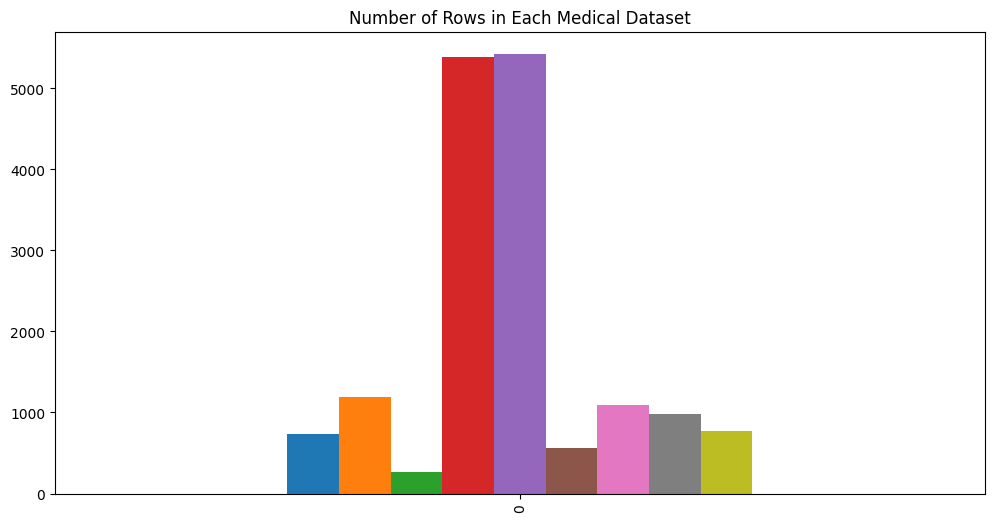

In [28]:
import matplotlib.pyplot as plt
data_row_df.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Number of Rows in Each Medical Dataset')